#### Faster R-CNN


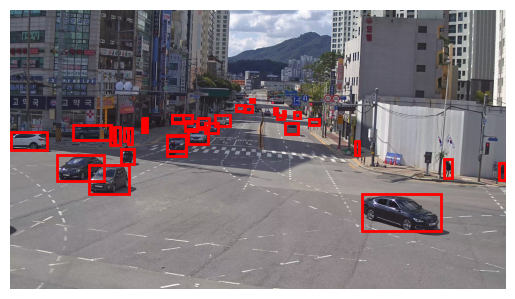

Number of Detected Objects in Classes 1, 3, 4, 6, 8: 88


In [2]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from PIL import Image

# Faster R-CNN 모델 불러오기 (pre-trained=True로 설정하면 사전 훈련된 가중치를 사용합니다)
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True).eval()

# 이미지 로드
image_path = "../image/image.jpg"  # 이미지 경로
image = Image.open(image_path)

# 이미지 전처리
transform = transforms.Compose([
    transforms.ToTensor()
])
image_tensor = transform(image).unsqueeze(0)  # 배치 차원 추가

# 객체 검출 수행
with torch.no_grad():
    predictions = model(image_tensor)

# 클래스 1과 3에 해당하는 객체만 추출하여 시각화
plt.imshow(image)
ax = plt.gca()
for box, label, score in zip(predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['scores']):
    if score > 0.5 and label in [1, 3, 4, 6, 8]:  # 클래스 1, 3, 4, 6, 8만 그리기
        box = box.cpu().numpy()
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, edgecolor='red', linewidth=2))
plt.axis('off')  # 축 제거
plt.show()


# 클래스 1과 3에 해당하는 객체의 수 출력
num_objects = sum(1 for label in predictions[0]['labels'].cpu().numpy() if label in [1, 3, 4, 6, 8])
print("Number of Detected Objects in Classes 1, 3, 4, 6, 8:", num_objects)


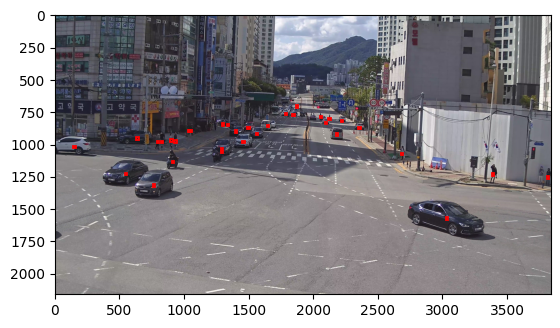

Number of Detected Objects in Classes 1, 3, 4, 6, 8: 88


In [2]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from PIL import Image

# Faster R-CNN 모델 불러오기 (pre-trained=True로 설정하면 사전 훈련된 가중치를 사용합니다)
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True).eval()

# 이미지 로드
image_path = "image.jpg"  # 이미지 경로
image = Image.open(image_path)

# 이미지 전처리
transform = transforms.Compose([
    transforms.ToTensor()
])
image_tensor = transform(image).unsqueeze(0)  # 배치 차원 추가

# 객체 검출 수행
with torch.no_grad():
    predictions = model(image_tensor)

# 클래스 1과 3에 해당하는 객체만 추출하여 시각화
plt.imshow(image)
ax = plt.gca()
for box, label, score in zip(predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['scores']):
    if score > 0.5 and label in [1, 3, 4, 6, 8]:  # 클래스 1, 3, 4, 6, 8만 그리기
        box = box.cpu().numpy()
        # 바운딩 박스의 중심 좌표 계산
        x_center = (box[0] + box[2]) / 2
        y_center = (box[1] + box[3]) / 2
        # 새로운 바운딩 박스 좌표 계산 (크기를 10x10으로 고정)
        new_box = [
            max(x_center - 5, 0), max(y_center - 5, 0),  # 왼쪽 상단 좌표
            min(x_center + 5, image.size[0]), min(y_center + 5, image.size[1])  # 오른쪽 하단 좌표
        ]
        ax.add_patch(plt.Rectangle((new_box[0], new_box[1]), new_box[2] - new_box[0], new_box[3] - new_box[1], fill=False, edgecolor='red', linewidth=2))
plt.show()

# 클래스 1과 3에 해당하는 객체의 수 출력
num_objects = sum(1 for label in predictions[0]['labels'].cpu().numpy() if label in [1, 3, 4, 6, 8])
print("Number of Detected Objects in Classes 1, 3, 4, 6, 8:", num_objects)


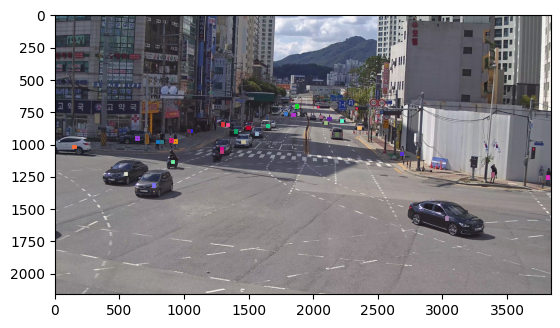

Number of Detected Objects in Classes 1, 3, 4, 6, 8: 88


In [3]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from PIL import Image
import random

# Faster R-CNN 모델 불러오기 (pre-trained=True로 설정하면 사전 훈련된 가중치를 사용합니다)
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True).eval()

# 이미지 로드
image_path = "image.jpg"  # 이미지 경로
image = Image.open(image_path)

# 이미지 전처리
transform = transforms.Compose([
    transforms.ToTensor()
])
image_tensor = transform(image).unsqueeze(0)  # 배치 차원 추가

# 객체 검출 수행
with torch.no_grad():
    predictions = model(image_tensor)

# 클래스 1과 3에 해당하는 객체만 추출하여 시각화
plt.imshow(image)
ax = plt.gca()
for box, label, score in zip(predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['scores']):
    if score > 0.5 and label in [1, 3, 4, 6, 8]:  # 클래스 1, 3, 4, 6, 8만 그리기
        box = box.cpu().numpy()
        # 바운딩 박스의 중심 좌표 계산
        x_center = (box[0] + box[2]) / 2
        y_center = (box[1] + box[3]) / 2
        # 새로운 바운딩 박스 좌표 계산 (크기를 10x10으로 고정)
        new_box = [
            max(x_center - 5, 0), max(y_center - 5, 0),  # 왼쪽 상단 좌표
            min(x_center + 5, image.size[0]), min(y_center + 5, image.size[1])  # 오른쪽 하단 좌표
        ]
        # 랜덤한 색상 생성
        color = (random.random(), random.random(), random.random())
        # 시각화
        ax.add_patch(plt.Rectangle((new_box[0], new_box[1]), new_box[2] - new_box[0], new_box[3] - new_box[1],
                                   fill=False, edgecolor=color, linewidth=2))
plt.show()

# 클래스 1과 3에 해당하는 객체의 수 출력
num_objects = sum(1 for label in predictions[0]['labels'].cpu().numpy() if label in [1, 3, 4, 6, 8])
print("Number of Detected Objects in Classes 1, 3, 4, 6, 8:", num_objects)


In [16]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import cv2
import numpy as np
import random

model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True).eval()

image_path = "image.jpg"
image = cv2.imread(image_path)

# 원본 이미지의 가로와 세로 길이
original_height, original_width = image.shape[:2]

# 목표하는 이미지의 가로와 세로 길이
target_width, target_height = 1920, 1080

# 가로와 세로 중 더 짧은 쪽을 기준으로 비율 계산
aspect_ratio = min(target_width / original_width, target_height / original_height)

# 이미지 크기 조정
image = cv2.resize(image, (int(original_width * aspect_ratio), int(original_height * aspect_ratio)))

transform = transforms.Compose([
    transforms.ToTensor()
])
image_tensor = transform(image).unsqueeze(0)

with torch.no_grad():
    predictions = model(image_tensor)

for box, label, score in zip(predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['scores']):
    if score > 0.5 and label in [1, 3, 4, 6, 8]:
        box = box.cpu().numpy()
        x_center = int((box[0] + box[2]) / 2)
        y_center = int((box[1] + box[3]) / 2)
        new_box = [
            max(x_center - 5, 0), max(y_center - 5, 0),
            min(x_center + 5, image.shape[1]), min(y_center + 5, image.shape[0])
        ]
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.rectangle(image, (new_box[0], new_box[1]), (new_box[2], new_box[3]), color, thickness=2)

cv2.imshow("Detected Objects", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

num_objects = sum(1 for label in predictions[0]['labels'].cpu().numpy() if label in [1, 3, 4, 6, 8])
print("Number of Detected Objects in Classes 1, 3, 4, 6, 8:", num_objects)


c:\Users\jhp12\anaconda3\envs\iist_weather\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jhp12\anaconda3\envs\iist_weather\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Number of Detected Objects in Classes 1, 3, 4, 6, 8: 87


#### Yolo v8


In [15]:
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

<div> Yolov8 detection class </div>
0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant'

In [3]:
test_result = model.predict('../image/image.jpg', save=False, imgsz=(1920,1080), conf=0.5)

NameError: name 'model' is not defined


WARNING ⚠️ imgsz=[1920, 1080] must be multiple of max stride 32, updating to [1920, 1088]
image 1/1 c:\Users\jhp12\Desktop\park\git\weather-forecast\car\..\image\image.jpg: 608x1088 1 person, 8 cars, 414.0ms
Speed: 5.0ms preprocess, 414.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 1088)
1740.63525390625 976.9677734375 1769.44580078125 1044.2119140625
528.5750732421875 681.3168334960938 579.7315063476562 723.8658447265625
640.0035400390625 644.6635131835938 682.696533203125 681.0381469726562
674.027099609375 823.8587036132812 738.9224243164062 882.0393676757812
518.2694091796875 947.9798583984375 599.0799560546875 1004.5956420898438
627.5931396484375 956.4053955078125 675.1666870117188 1008.47021484375
700.0779418945312 630.7987670898438 747.151123046875 670.8893432617188
631.8582153320312 683.4274291992188 685.5221557617188 737.362060546875
413.0205383300781 930.7698974609375 495.20574951171875 1001.0181884765625
차량대수 :  8
사람 수 :  1


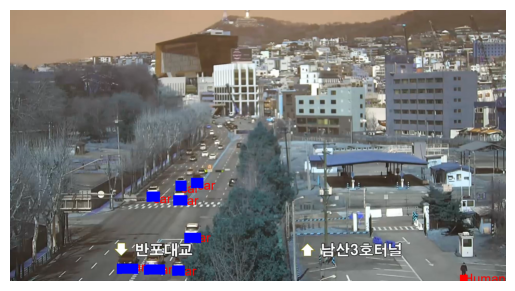

In [18]:
# Load a model
model = YOLO('yolov8m.pt')  # pretrained YOLOv8n model

# Run batched inference on a list of images
# results = model('..\image\image.jpg', stream=True)  # return a list of Results objects
results = model.predict('../image/image.jpg', save=False, imgsz=(1920,1080), conf=0.5)
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    # masks = result.masks  # Masks object for segmentation masks outputs
    # keypoints = result.keypoints  # Keypoints object for pose outputs
    # probs = result.probs  # Probs object for classification outputs
    # result.show()  # display to screen
    # result.save(filename='result_x.jpg')  # save to disk
    img = result.orig_img
    boxes_xy = boxes.xyxy
    clses = boxes.cls

    # numpy 배열을 PIL 이미지로 변환
    image_pil = Image.fromarray(img)

    # PIL ImageDraw 객체 생성
    draw = ImageDraw.Draw(image_pil)

    # print(clses)
    # print(len(clses))
    # print(boxes_xy)
    # print(len(boxes_xy))
    # print(result)
    car_cnt = 0
    human_cnt =0
    # bounding box 그리기
    for cls, box in zip(clses, boxes_xy):
        if cls == 0 or cls == 2:
            text ='default'
            if cls == 0: 
                text, box_color = 'Human', 'red'
                human_cnt +=1
            if cls == 2: 
                text, box_color = 'car' , 'blue'
                car_cnt +=1
            x_min, y_min, x_max, y_max = box.tolist()

            # 1. 텍스트 표시 위치 계산
            x_center = (x_min + x_max) / 2
            y_center = (y_min + y_max) / 2

            # 2. 텍스트 표시
            draw.text((x_center, y_center), text, font=ImageFont.truetype("arial.ttf", 50), fill="red")

            # 3. (선택 사항) 테두리 추가 (박스와 텍스트 구분 용이)
            draw.rectangle([x_min, y_max, x_max, y_max], outline=box_color, width=20)
            # print(text)
            print(x_min, y_min, x_max, y_max)
                

    print('차량대수 : ',car_cnt)
    print('사람 수 : ',human_cnt)
    # 이미지 표시
    plt.imshow(image_pil)
    plt.axis('off')  # 축 제거

In [ ]:
# Load a model
model = YOLO('yolov8n.pt')  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model('..\image\image.jpg', stream=True)  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    # masks = result.masks  # Masks object for segmentation masks outputs
    # keypoints = result.keypoints  # Keypoints object for pose outputs
    # probs = result.probs  # Probs object for classification outputs
    # result.show()  # display to screen
    # result.save(filename='result_x.jpg')  # save to disk